# 차선 인식에 널리 사용되는 방식 (차량 객체(Traffic Object), 주행 가능 영역 인식 결과, 차선 인식 결과)

traditional vision 방식과 Deep learning을 활용한 방식 크게 2가지.

# pre-train about specitical domain (ex. yolop)

YOLOP pretrained on the BDD100K dataset

[yolop 공식문서(한글)](https://pytorch.kr/hub/hustvl_yolop/)

# 1. traditional vision

# 원본 영상 읽어오기
(1) 원본 영상을 읽어오기

## RGB 색상범위 필터링
(2) 흰색, 노란색 범위에 있는 것만 필터링하여 후보로 저장

## GrayScale로 변환
(3) 영상을 GrayScale로 변환

## Canny Edge Detection으로 엣지를 뽑아 진짜 필요한 픽셀만 체크
(4) Canny Edge Detection으로 에지를 추출 (잡음 제거를 위한 Gaussian 필터링도 포함)

## 여러 차선중 관심 영역 선택하여 구체화
(5) 자동차의 진행 방향 바닥에 존재하는 차선만을 검출하기 위한 관심 영역을 지정

## 엣지로 hough 변환을 토대로 직선 성분 추출
(6) Hough 변환으로 에지에서의 직선 성분을 추출

## 추후 나올 선을 예측
(7) 추출한 직선 성분으로 좌우 차선에 있을 가능성이 있는 직선들만 따로 뽑아서 좌우 각각 직선을 계산하고 선형 회귀로 가장 적합한 선 찾기

### 추후 활용(7번을 토대로 차선 안에 있도록 방향 세팅)
(8) 자동차의 진행 방향을 예측

### 차선 출력 / 진행방향 출력
(9) 영상에 최종 차선을 선으로 그리고 내부 다각형을 색으로 채운다. 예측 진행 방향 텍스트를 영상에 출력
### (선택)
(10) 결과 영상을 동영상 파일로 저장하고 중간에 캡쳐하여 사진으로 저장
### (선택)
(11) 결과 영상을 출력

In [ ]:
# 잘 정돈된 환경에서 진행한다고 가정

## 거친 환경에서 해결할 수 있는 방법 제안은 나중에 진행 가능(우선 제거를 하고, 공통적 부분을 설계하면되게)

In [ ]:
### /content/drive/MyDrive/project/data/automonous_data/loadDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 도로 이미지 불러기(cvtColor()를 이용해 흑백 전환)

### 1번 진행(2번생략)

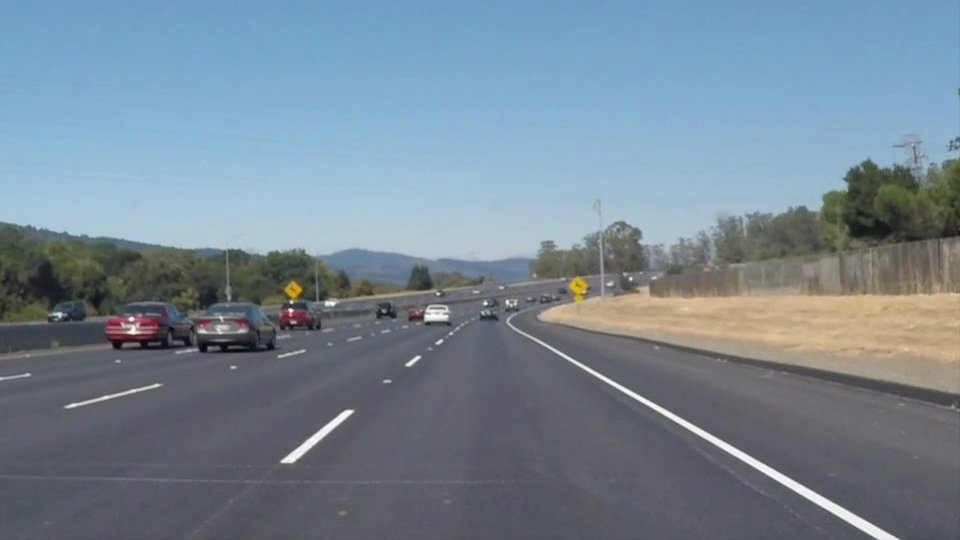

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

path = '../content/drive/MyDrive/project/data/automonous_data/loadDataset/solidWhiteCurve.jpg'
src = cv2.imread(path)



cv2_imshow(src)


### 3번 진행: 도로와 차선의 색상 차이가 크기 때문에, 이미지를 Grayscale로 변환

### GrayScale

#### 연산량 대폭 감소 효과(But,추출 정확도 하락 가능)

#### 추출이 맘에 들지 않으면 컬러 해놓고 진행하는 것 추천

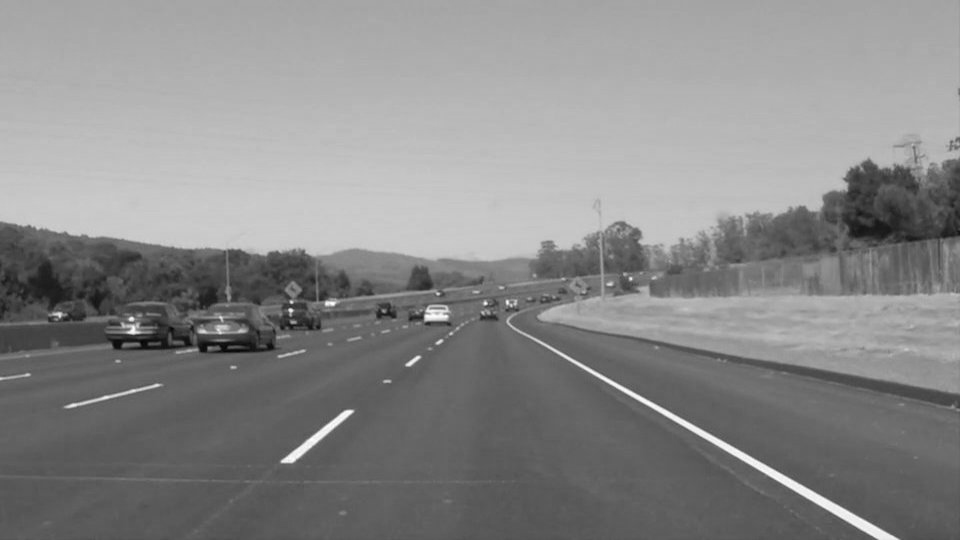

7


In [ ]:
gray= cv2.cvtColor(src, cv2.COLOR_RGB2GRAY) # cvtColor는 색상을 바꾼다. cv2.COLOR_~옵션으로 색상에 해당하는 16진수등 코드를 제공

cv2_imshow(gray)
print(cv2.COLOR_RGB2GRAY)

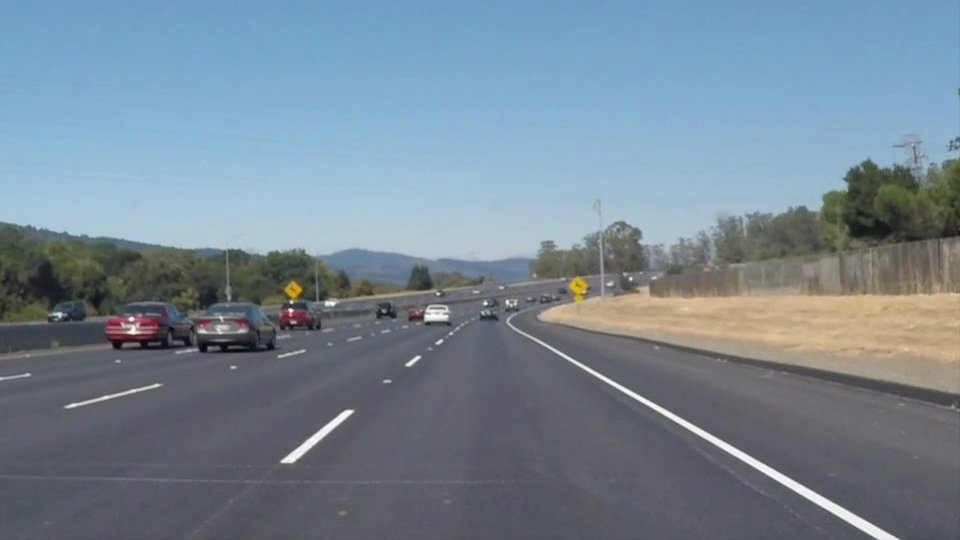

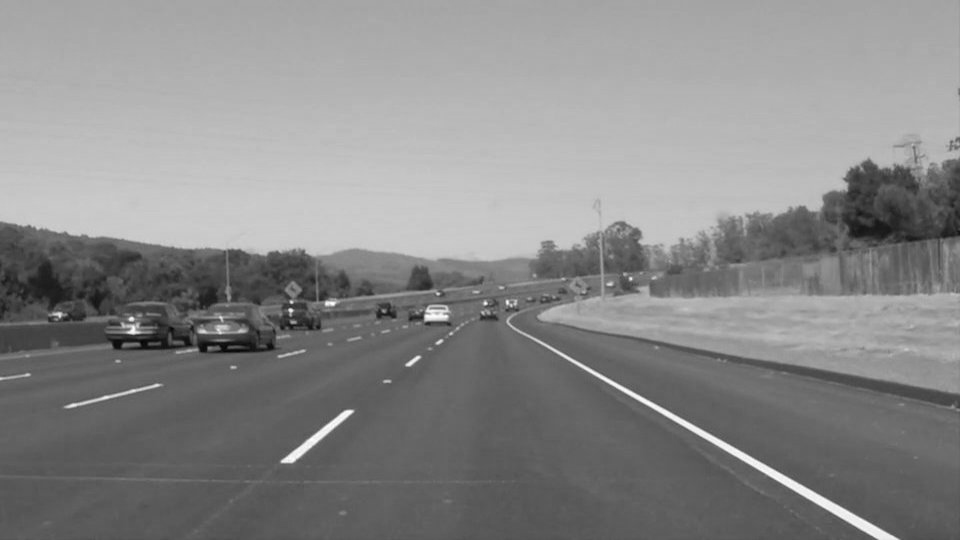

In [ ]:
cv2_imshow(src)
cv2_imshow(gray)

### 참고) 가우시안 블러 처리 가능함.

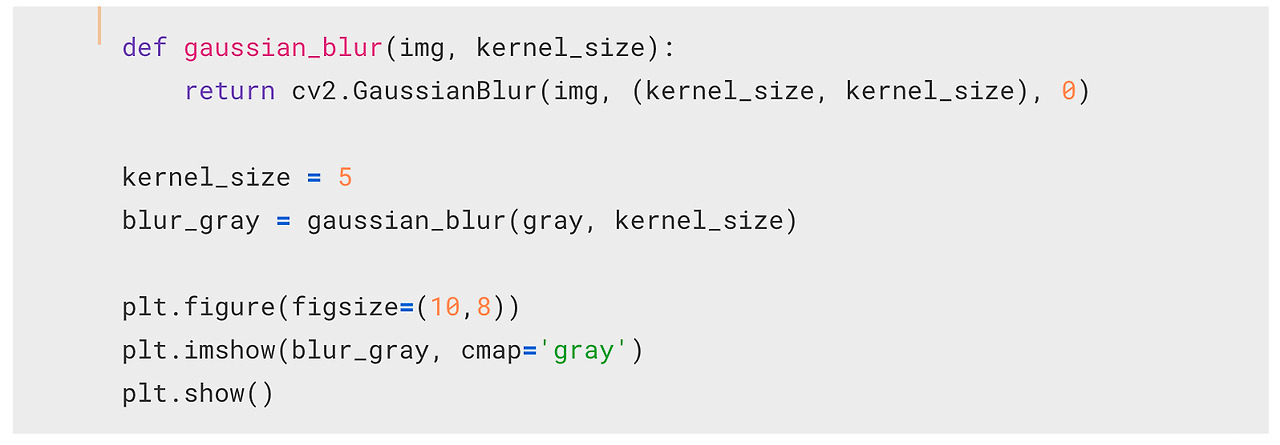

## **1번 진행



```

# -*- coding: cp949 -*-
# -*- coding: utf-8 -*-  # 한글 주석쓰려면 이거 해야함
import cv2 # opencv 사용
from google.colab.patches import cv2_imshow
path_ex = '../content/drive/MyDrive/project/data/automonous_data/loadDataset/solidWhiteCurve.jpg'
src_ex = cv2.imread(path_ex)
cv2_imshow(src_ex)

```



최종 코드



```
import cv2 # opencv 사용
from google.colab.patches import cv2_imshow

path_ex = '../content/drive/MyDrive/project/data/automonous_data/loadDataset/solidWhiteCurve.jpg'

image = cv2.imread(path_ex)
height, width = image.shape[:2] # 이미지 높이, 너비


```



In [ ]:
# 위의 코드 실행해보자.(하고 나서 반드시 주석처리)
import cv2 # opencv 사용
from google.colab.patches import cv2_imshow

path_ex = '../content/drive/MyDrive/project/data/automonous_data/loadDataset/solidWhiteCurve.jpg'

image = cv2.imread(path_ex)
height, width = image.shape[:2] # 이미지 높이, 너비

## **2번에서 색상을 달리 추출(흰색)
### 흑백 이미로 바뀐ㄷㅏ.



자. 위 이미지에서 차선의 특징을 찾아보자. 뭐가 있을까?? -> 흰색? 직선?

3차원 Color 이미지에서 완전한 흰색이 (255,255,255) 이라는 것 정도는 안다고 생각하면 이해



```
import numpy as np


mark_ex = np.copy(src_ex) # image 복사

#  BGR 제한 값 설정
blue_threshold = 200
green_threshold = 200
red_threshold = 200
bgr_threshold = [blue_threshold, green_threshold, red_threshold]

# BGR 제한 값보다 작으면 검은색으로
thresholds = (src_ex[:,:,0] < bgr_threshold[0]) \
            | (src_ex[:,:,1] < bgr_threshold[1]) \
            | (src_ex[:,:,2] < bgr_threshold[2])
mark_ex[thresholds] = [0,0,0]
cv2_imshow(mark_ex)

```



최종 코드



```
def mark_img(img, blue_threshold=200, green_threshold=200, red_threshold=200): # 흰색 차선 찾기

    #  BGR 제한 값
    bgr_threshold = [blue_threshold, green_threshold, red_threshold]

    # BGR 제한 값보다 작으면 검은색으로
    thresholds = (image[:,:,0] < bgr_threshold[0]) \
                | (image[:,:,1] < bgr_threshold[1]) \
                | (image[:,:,2] < bgr_threshold[2])
    mark[thresholds] = [0,0,0]
    return mark

```



In [ ]:
def mark_img(img, blue_threshold=200, green_threshold=200, red_threshold=200): # 흰색 차선 찾기

    #  BGR 제한 값
    bgr_threshold = [blue_threshold, green_threshold, red_threshold]

    # BGR 제한 값보다 작으면 검은색으로
    thresholds = (image[:,:,0] < bgr_threshold[0]) \
                | (image[:,:,1] < bgr_threshold[1]) \
                | (image[:,:,2] < bgr_threshold[2])
    mark[thresholds] = [0,0,0]
    return mark

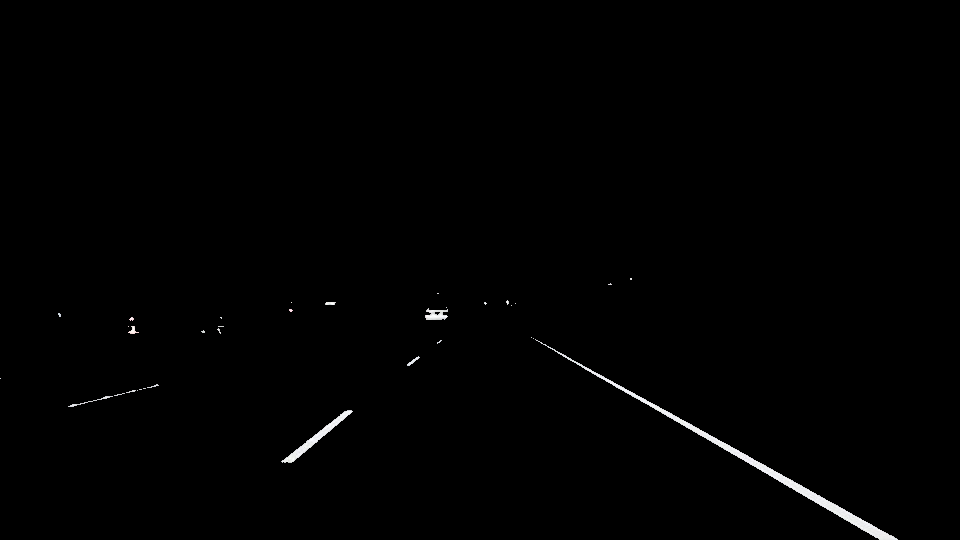

In [ ]:
# 위의 코드 실행해보자.(하고 나서 반드시 주석처리)


\

# 관심 영역 추출

## 4번보다 5번 먼저 진행(처리)

4번으로 엣지 추출하기 전에 5번 먼저 관심영역 추출진행



```
전체 화면에서 차선 정보를 찾는 것은 불필요한 영역도 탐색하게 되며 연산 자원과 배터리를 낭비합니다.

관심 영역을 지정해주면 연산량을 줄일 수 있습니다.
```



In [ ]:
height, width = gray.shape ## height, width 파악
print((height, width))

(540, 960)


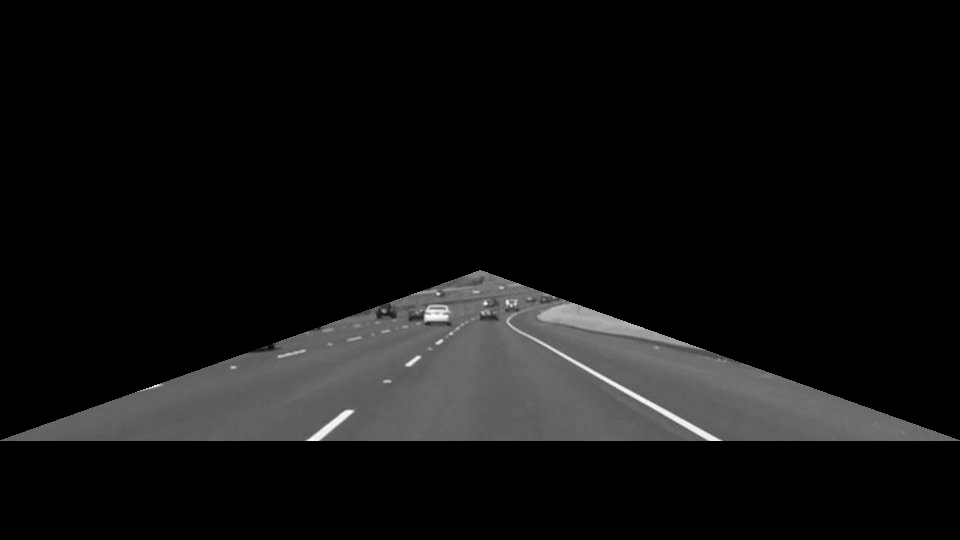

In [ ]:
interest_vertices = np.asarray([[ ## 광심 영역
    (0, height-100), # 100 기준으로 height만 보고 줄임
    (width // 2, height // 2), # 1/2를 width, height 적용
    (width, height-100), ## width 고려하고, height -100
]])

mask = np.zeros_like(gray) ## gray 처리한 부분을 mask처리한다. 0으로 채워진다.
mask_color = (255,)

## 이둘은 한세트다.
cv2.fillPoly(mask, interest_vertices, mask_color) ## fillPoly() mask_color로 255를 칠하게 된다.
cropped = cv2.bitwise_and(gray, mask) ## bitwise_and() mask와 mask_color

cv2_imshow(cropped)

## **5번 진행(ROI)후, 회색 찾아보기

차에서 카메라가 있는 위치는 어느정도 일정할 것이고.. 차선이 하늘에 떠있지는 않을 것 아닌가?? 그렇다면 차선이 있을 만한 구간을 정하고 그 안에 있는 흰색만을 찾아보자.




```
def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움

    ## mask는 0으로 된 기본 값으로 vertices로 세팅된 것에 color 대입
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image



```



In [ ]:
def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지

    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1

    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움

    ## mask는 0으로 된 기본 값으로 vertices로 세팅된 것에 color 대입
    cv2.fillPoly(mask, vertices, color)

    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image


In [ ]:
# 위의 코드 실행해보자.(하고 나서 반드시 주석처리)


## ** 최종 코드



```
# 사다리꼴 모형의 Points
vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
roi_img = region_of_interest(image, vertices) # vertices에 정한 점들 기준으로 ROI 이미지 생성


mark = np.copy(roi_img) # roi_img 복사
mark = mark_img(roi_img) # 흰색 차선 찾기

cv2_imshow(mask)
cv2_imshow(image)
```



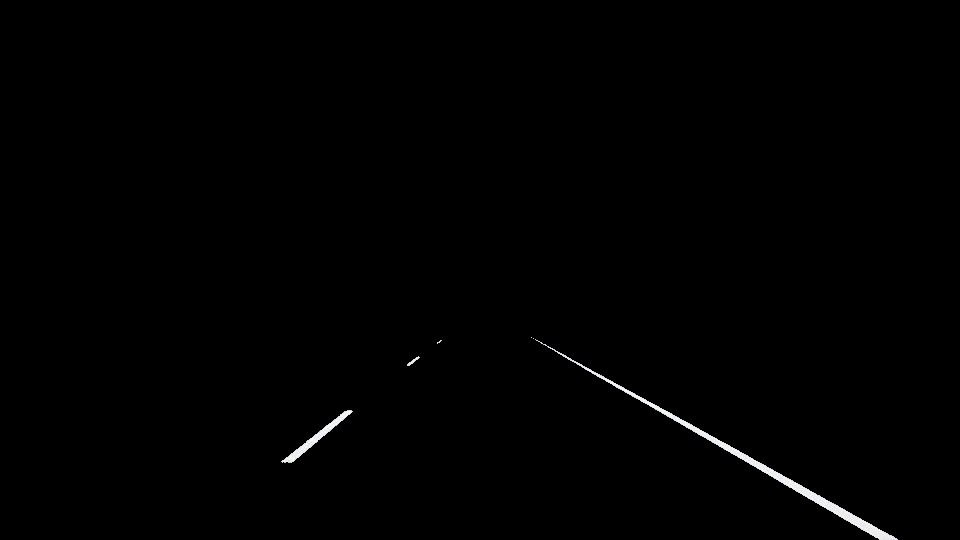

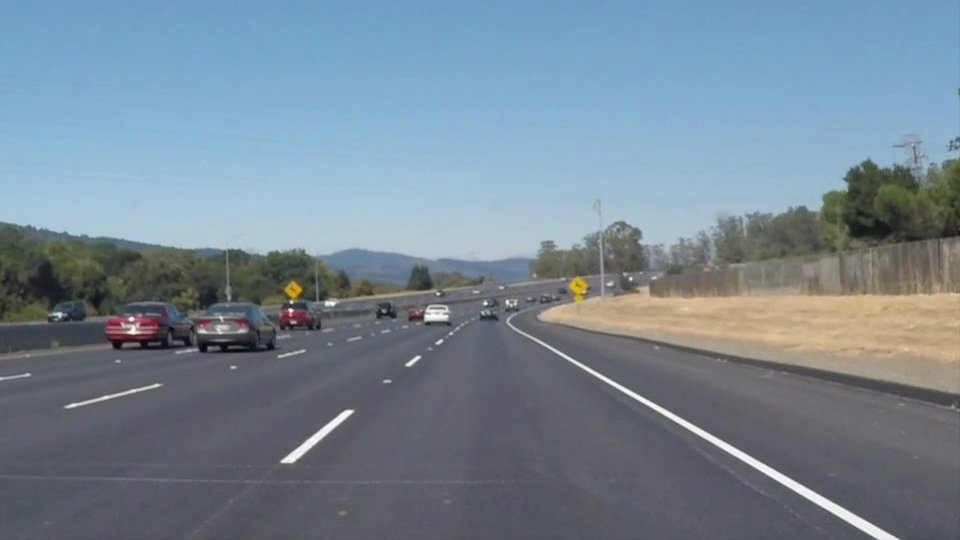

In [ ]:


# 사다리꼴 모형의 Points
vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
roi_img = region_of_interest(image, vertices) # vertices에 정한 점들 기준으로 ROI 이미지 생성


mark = np.copy(roi_img) # roi_img 복사
mark = mark_img(roi_img) # 흰색 차선 찾기

# 흰색 차선 검출한 부분을 원본 image에 overlap 하기
color_thresholds = (mark[:,:,0] == 0) & (mark[:,:,1] == 0) & (mark[:,:,2] > 200)

image[color_thresholds] = [0,0,255]

cv2_imshow(mark)
cv2_imshow(image)



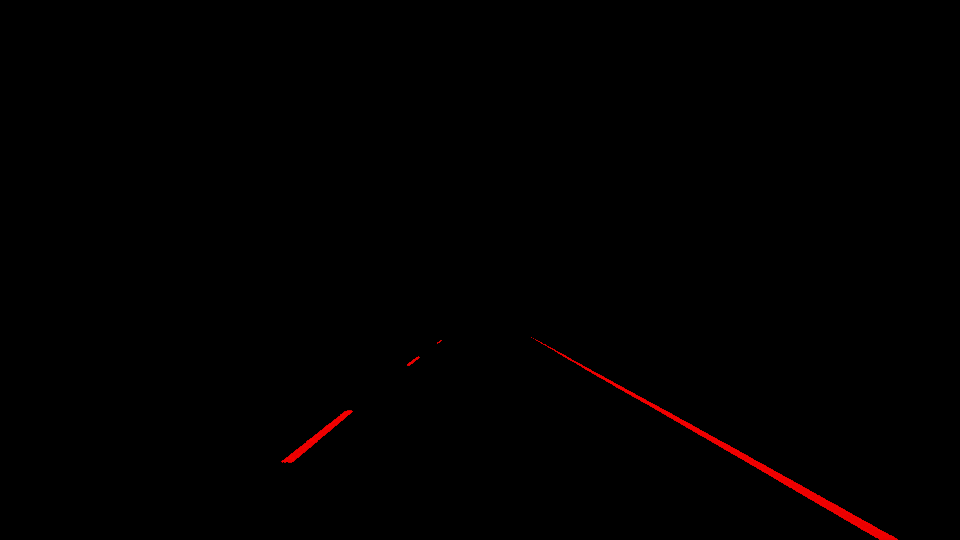

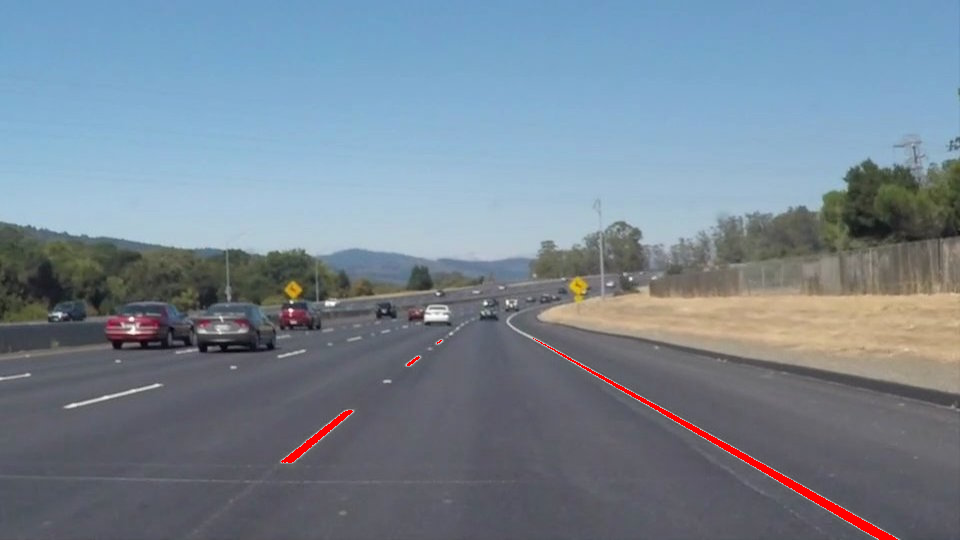

In [ ]:


# 사다리꼴 모형의 Points
vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
roi_img = region_of_interest(image, vertices, (0,0,255)) # vertices에 정한 점들 기준으로 ROI 이미지 생성


mark = np.copy(roi_img) # roi_img 복사
mark = mark_img(roi_img) # 흰색 차선 찾기

# 흰색 차선 검출한 부분을 원본 image에 overlap 하기
color_thresholds = (mark[:,:,0] == 0) & (mark[:,:,1] == 0) & (mark[:,:,2] > 200)

image[color_thresholds] = [0,0,255]

cv2_imshow(mark)
cv2_imshow(image)



# 크롭된 이미지에서 엣지 검출하기

## 4번 진행(5번 처리된 상태)

### Canny Edge 검출기를 사용하여 엣지를 찾아낸다.

### 가우시안 블러(노이즈 제거:smoothing) & Gradient 제거(불필요한 것들)

#### 커널 적용해야되는데, 홀수로 설정해야함

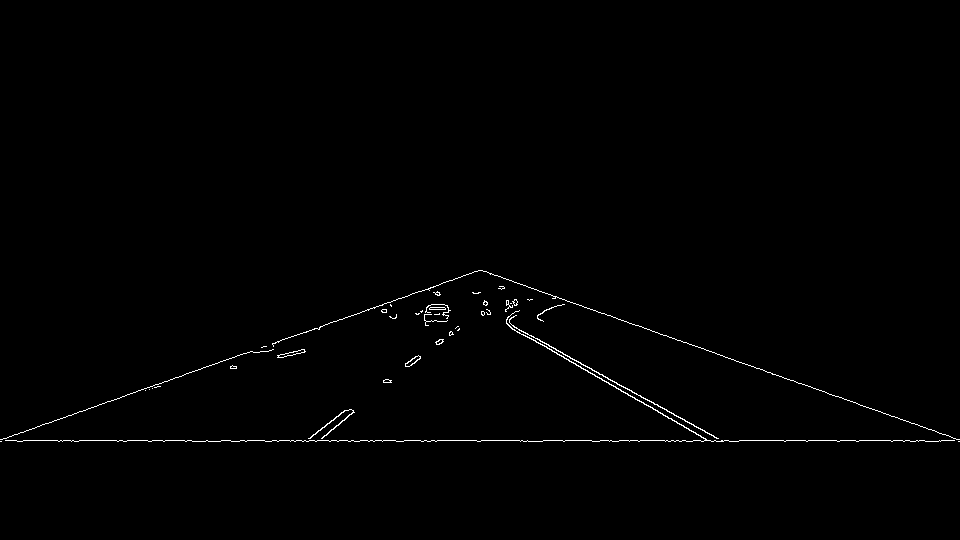

In [ ]:
cannyed = cv2.Canny(cropped, 200, 300)
cv2_imshow(cannyed)

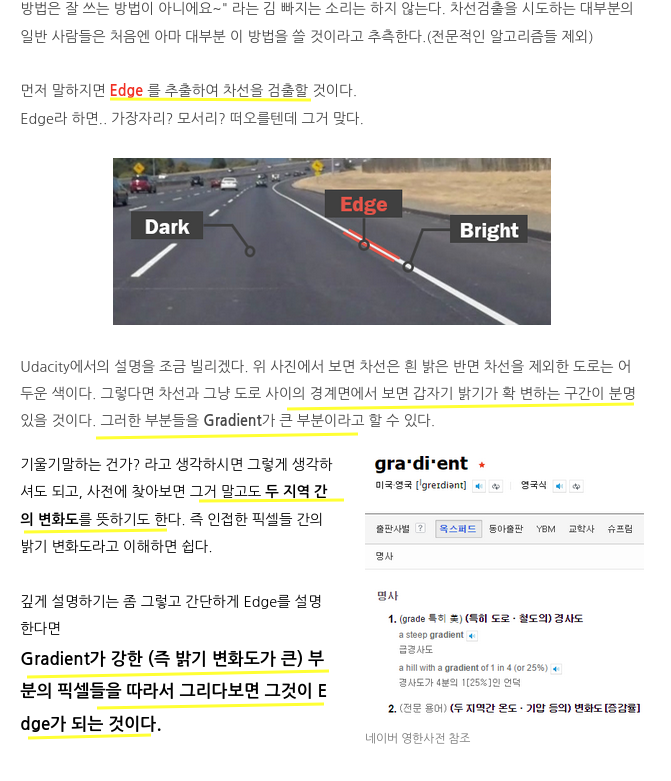

# 엣지로부터 라인 생성하기

## 6번 진행
[Hough 변환](https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html)으로 에지에서의 직선 성분을 추출

해당 기법에서 구체적으로 체크해보자.

a. 기본
- 표준 허프 변환
- 멀티 스케일 허프 변환

b. 개선
점진성 확률적 허프 변환(Progressive Probabilistic Hough Transform)


모든 점을 대상으로 직선의 방정식을 세우는 것이 아닌, 임의의 점 일부만 누적해서 계산합니다.

일부의 점만 사용하기 때문에 확률적이다.(확률적 선택)


정확도가 높은 입력 이미지에 대해 검출에 드는 시간이 대폭줄어들게 된다.(하지만, 해당 정확하지 않을 때는 우선 a를 토대로 계산야될 것)

[직선 검출(Line Detection)](https://076923.github.io/posts/Python-opencv-28/)

#### HoughLinesP()는 선분을 출력

output에서 선분의 시작점과 끝점에 대한 좌표값을 출력하고, 그렇기 때문에 함수 안에 선의 최소 길이라든지, 점 사이의 최대 간격을 설정해야 하는 것

### 모든 픽셀(이미지)에 대해 (r, theta)를 카운팅하고, 가장 많이 카운팅 된 (r, theta)를 확률적으로 직선이라고 판단합니다.

이미지에서 직선을 찾는 가장 보편적인 알고리즘입니다.

In [ ]:
lines = cv2.HoughLinesP(
    cannyed,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=10,# 40 -> 20 -> 10
    maxLineGap=25
)
lines

array([[[  5, 440, 954, 440]],

       [[486, 312, 706, 439]],

       [[581, 364, 631, 390]],

       [[127, 394, 183, 375]],

       [[598, 312, 654, 331]],

       [[599, 374, 666, 409]],

       [[ 37, 426,  87, 409]],

       [[220, 361, 279, 341]],

       [[824, 391, 891, 416]],

       [[314, 328, 382, 305]],

       [[660, 334, 722, 355]],

       [[387, 382, 487, 309]],

       [[482, 311, 562, 352]],

       [[253, 352, 273, 346]],

       [[483, 303, 502, 288]],

       [[ 68, 415, 157, 386]],

       [[303, 441, 346, 410]],

       [[383, 382, 415, 356]],

       [[426, 307, 440, 304]],

       [[362, 311, 428, 289]],

       [[426, 308, 442, 304]]], dtype=int32)

```
    image – 8bit, single-channel binary image, canny edge를 선 적용.
    rho – r 값의 범위 (0 ~ 1 실수)
    theta – 𝜃 값의 범위(0 ~ 180 정수)
    threshold – 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.
    minLineLength – 선의 최소 길이. 이 값보다 작으면 reject.
    maxLineGap – 선과 선사이의 최대 허용간격. 이 값보다 작으며 reject.
```

In [ ]:
line_painted = np.zeros((height, width, 3), dtype=np.uint8)
print(line_painted)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


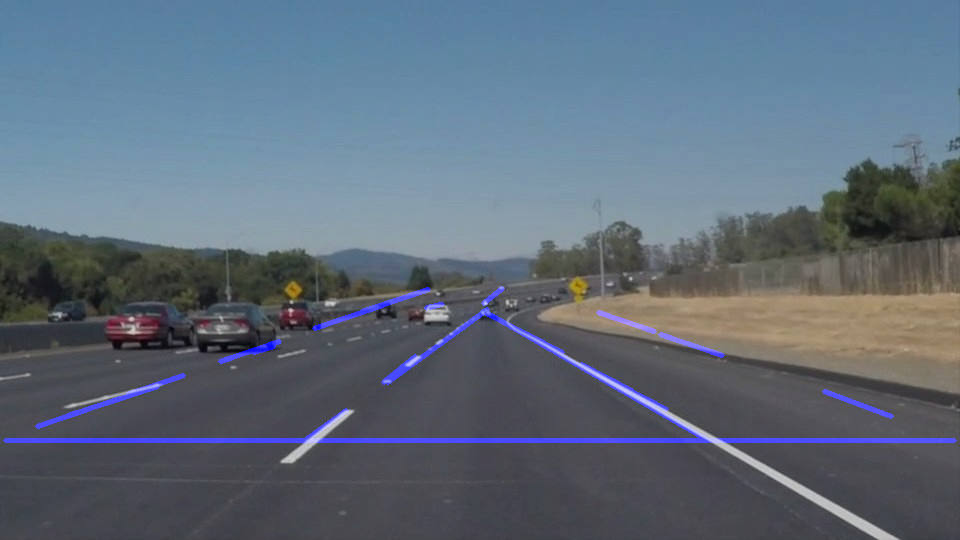

In [ ]:
for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(line_painted, (x1, y1), (x2, y2), color=[255, 0, 0], thickness=3)

line_painted = cv2.addWeighted(src, 0.8, line_painted, 1.0, 0.0)
cv2_imshow(line_painted)

#### 길이를 더 짧게 변환시켜보자.

minLineLength=10으로  40 -> 20 -> 10 변환시킴.

# 다른 예제 코드로 진행해보자.(opencv)

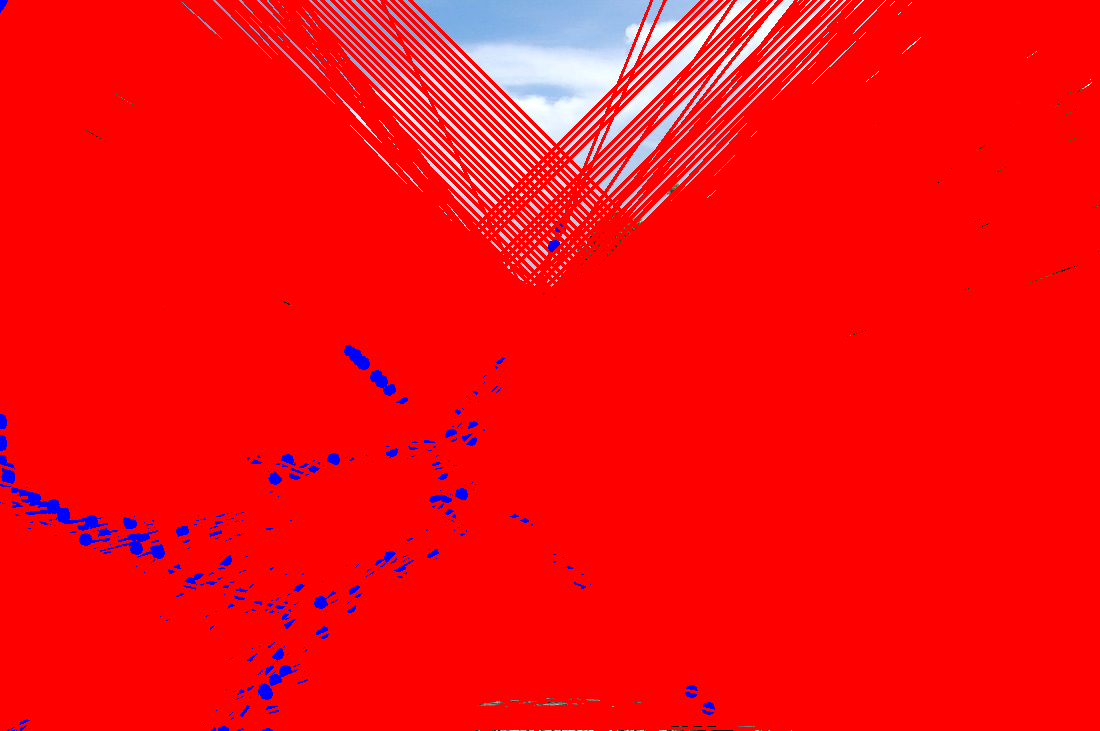

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

src = cv2.imread("../content/drive/MyDrive/project/data/automonous_data/loadDataset/rail.jpg")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)



canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)

for i in lines:
    rho, theta = i[0][0], i[0][1]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a*rho, b*rho

    scale = src.shape[0] + src.shape[1]

    x1 = int(x0 + scale * -b)
    y1 = int(y0 + scale * a)
    x2 = int(x0 - scale * -b)
    y2 = int(y0 - scale * a)

    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.circle(dst, (int(x0), int(y0)), 3, (255, 0, 0), 5, cv2.FILLED)

cv2_imshow(dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

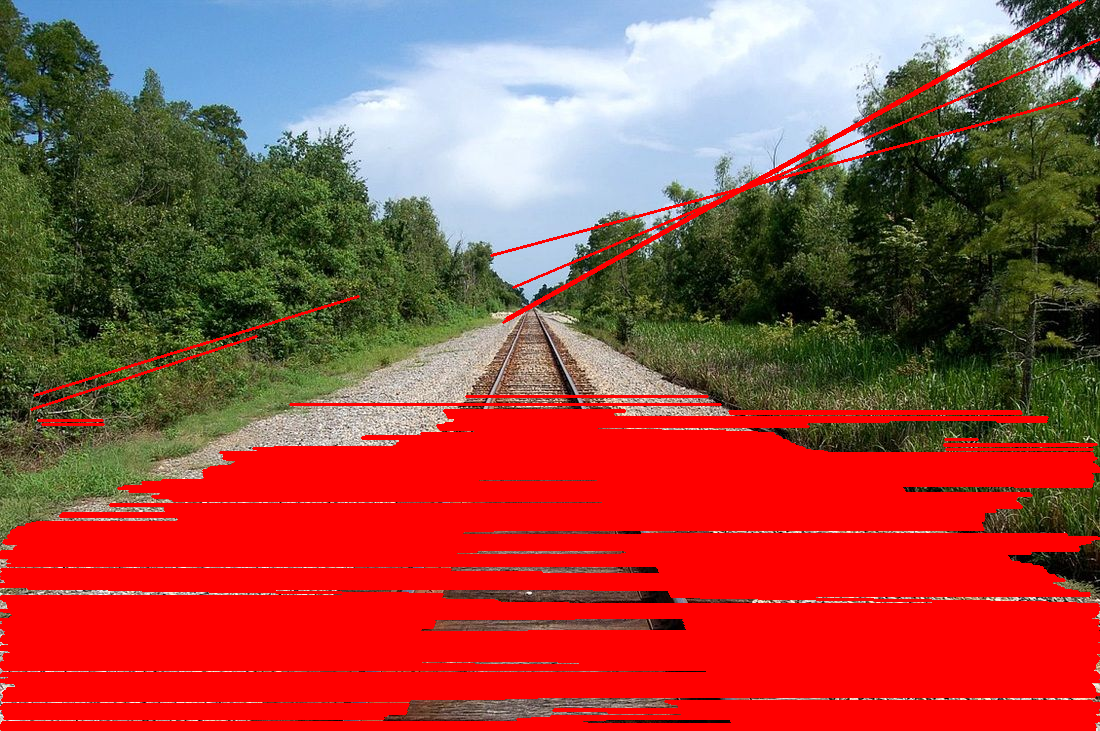

In [ ]:
src = cv2.imread("../content/drive/MyDrive/project/data/automonous_data/loadDataset/rail.jpg")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

for i in lines:
    cv2.line(dst, (int(i[0][0]), int(i[0][1])), (int(i[0][2]), int(i[0][3])), (0, 0, 255), 2)

cv2_imshow(dst)






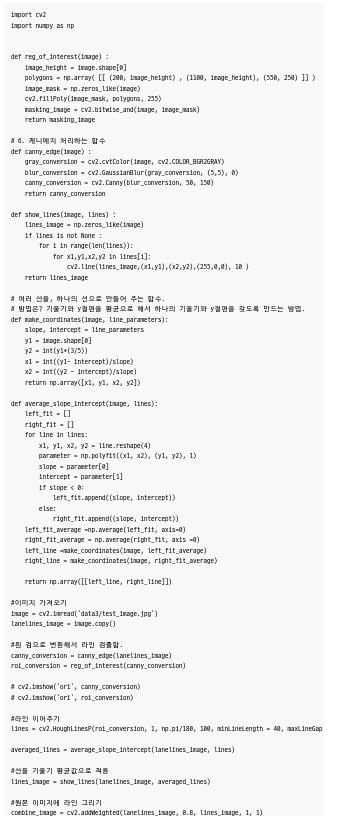

#### 역시 주어진 이미지에 따라 정확도 차이가 심하다.

그리고 속도 차이가 심하게 바뀐다.
딥러닝 기반을 사용하는 이유를 알겠다.

영상정보처리를 사용할 때 기본적인 변환을 토대로 적합하게 간단한 처리시, 비약적 성능 향상할 때나, 데이터 증강등... 여러가지 고려해볼 때, 사용할 듯..

# 참고

[OpenCV Python Tutorial - Find Lanes for Self-Driving Cars (Computer Vision Basics Tutorial)](https://www.youtube.com/watch?v=eLTLtUVuuy4&list=WL&index=5)


[이미지의 기하학적 변형](https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html)

# 2. Deep learning(다음 프로젝트)